In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("D:\\0626_temp")

In [40]:
# read the parquet file
import fastparquet
def_sharps = pd.read_parquet('D:\\0626_temp\\processed_high-qual_near-center-70_no-nas_flares.parquet', engine='fastparquet')

In [4]:
from pathlib import Path

def read_all_harp_csvs(root: str | Path, recursive: bool = False) -> pd.DataFrame:
    """
    Read all per-HARP CSVs under `root`, concatenate them in ascending HARP order,
    Assumes files are named like HARP_<harpnum>.csv.
    """

    root = Path(root)
    pattern = "**/HARP_*.csv" if recursive else "HARP_*.csv"

    # List files first, sorted by HARP number
    harp_files = []
    for f in root.glob(pattern):
        try:
            harpnum = int(f.stem.split("_")[1])
            harp_files.append((harpnum, f))
        except Exception:
            continue

    # sort by numeric harp number
    harp_files.sort(key=lambda x: x[0])

    frames = []

    for harpnum, f in harp_files:
        # read with T_REC parsed as datetime
        df = pd.read_csv(f, parse_dates=["T_REC"])
        print(f"Reading HARP {harpnum}")

        # Skip if the HARP lifetime is less than 120 rows (24h / 12min cadence)
        if len(df) < 120:
            print(f"  -> Skipping HARP {harpnum} (too short)")
            continue
        # fill the HARPNUM with the harpnum
        df['HARPNUM'] = harpnum
        frames.append(df)

    if not frames:
        print("No valid HARP CSVs found.")
        return pd.DataFrame()

    # Concatenate in correct order
    full_df = pd.concat(frames, ignore_index=True)
    print(f"Loaded {len(frames)} HARPs; total rows = {len(full_df)}")
    
    return full_df

In [41]:
nrt_sharps = read_all_harp_csvs(r"D:\\Input Data\\Operational Data\\HMI\\SHARP_by_HARP")

Reading HARP 476
Reading HARP 487
Reading HARP 493
Reading HARP 495
Reading HARP 497
Reading HARP 498
Reading HARP 499
  -> Skipping HARP 499 (too short)
Reading HARP 500
  -> Skipping HARP 500 (too short)
Reading HARP 501
Reading HARP 502
Reading HARP 503
Reading HARP 504
Reading HARP 505
Reading HARP 506
  -> Skipping HARP 506 (too short)
Reading HARP 508
Reading HARP 509
Reading HARP 510
Reading HARP 511
Reading HARP 512
Reading HARP 513
  -> Skipping HARP 513 (too short)
Reading HARP 514
  -> Skipping HARP 514 (too short)
Reading HARP 515
Reading HARP 516
Reading HARP 518
  -> Skipping HARP 518 (too short)
Reading HARP 520
Reading HARP 521
Reading HARP 523
Reading HARP 524
  -> Skipping HARP 524 (too short)
Reading HARP 526
Reading HARP 527
Reading HARP 529
Reading HARP 532
Reading HARP 533
  -> Skipping HARP 533 (too short)
Reading HARP 534
Reading HARP 537
Reading HARP 547
  -> Skipping HARP 547 (too short)
Reading HARP 550
Reading HARP 552
  -> Skipping HARP 552 (too short)
Read

C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\2427577827.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f, parse_dates=["T_REC"])


Reading HARP 11386
  -> Skipping HARP 11386 (too short)
Reading HARP 11388
  -> Skipping HARP 11388 (too short)
Reading HARP 11389
Reading HARP 11390
Reading HARP 11391
Reading HARP 11392
Reading HARP 11394
Reading HARP 11395
  -> Skipping HARP 11395 (too short)
Reading HARP 11396
  -> Skipping HARP 11396 (too short)
Reading HARP 11397
Reading HARP 11398
Reading HARP 11399
Reading HARP 11400
  -> Skipping HARP 11400 (too short)
Reading HARP 11401
Reading HARP 11402
Reading HARP 11404
  -> Skipping HARP 11404 (too short)
Reading HARP 11406
  -> Skipping HARP 11406 (too short)
Reading HARP 11408
  -> Skipping HARP 11408 (too short)
Reading HARP 11409
  -> Skipping HARP 11409 (too short)
Reading HARP 11411
  -> Skipping HARP 11411 (too short)
Reading HARP 11412
  -> Skipping HARP 11412 (too short)
Reading HARP 11413
Reading HARP 11414
Reading HARP 11415
  -> Skipping HARP 11415 (too short)
Reading HARP 11416
  -> Skipping HARP 11416 (too short)
Reading HARP 11419
Reading HARP 11420
Readin

In [42]:
# delete rows with key columns any NaN values
key_columns = [
    'USFLUX','MEANGAM','MEANGBT','MEANGBZ','MEANGBH','MEANJZD',
    'TOTUSJZ','MEANALP','MEANJZH','TOTUSJH','ABSNJZH','SAVNCPP',
    'MEANPOT','TOTPOT','MEANSHR','SHRGT45','SIZE','SIZE_ACR',
    'NACR','NPIX'
]
nrt_sharps = nrt_sharps.dropna(subset=key_columns)

In [7]:
def_sharps.shape[0] - nrt_sharps.shape[0]

2312582

In [8]:
def_sharps[def_sharps['T_REC'] >= '2012-09-14'].shape

(3237013, 54)

In [9]:
nrt_sharps.shape

(1662183, 28)

In [10]:
def_sharps[def_sharps['T_REC'] >= '2012-09-14']['HARPNUM'].nunique()

4926

In [16]:
nrt_sharps['HARPNUM'].nunique()

3855

In [18]:
nrt_harps = sorted(nrt_sharps['HARPNUM'].unique())
def_harps = sorted(def_sharps['HARPNUM'].unique())

len(nrt_harps), len(def_harps)

(3855, 6017)

In [40]:
len(set(def_harps) - set(nrt_harps)) / len(set(nrt_harps))  # present in DEF only

1.0775616083009079

In [20]:
set(nrt_harps) - set(def_harps)    # present in NRT only

{np.int64(8231),
 np.int64(8235),
 np.int64(8254),
 np.int64(8261),
 np.int64(8276),
 np.int64(8279),
 np.int64(8284),
 np.int64(8296),
 np.int64(8304),
 np.int64(8307),
 np.int64(8308),
 np.int64(8312),
 np.int64(8314),
 np.int64(8315),
 np.int64(8317),
 np.int64(8344),
 np.int64(8345),
 np.int64(8372),
 np.int64(8380),
 np.int64(8393),
 np.int64(8405),
 np.int64(8409),
 np.int64(8410),
 np.int64(8418),
 np.int64(8420),
 np.int64(8423),
 np.int64(8639),
 np.int64(8647),
 np.int64(8662),
 np.int64(476),
 np.int64(8673),
 np.int64(487),
 np.int64(8685),
 np.int64(8688),
 np.int64(497),
 np.int64(502),
 np.int64(503),
 np.int64(8694),
 np.int64(505),
 np.int64(8700),
 np.int64(511),
 np.int64(8703),
 np.int64(8706),
 np.int64(515),
 np.int64(8707),
 np.int64(520),
 np.int64(521),
 np.int64(523),
 np.int64(8719),
 np.int64(529),
 np.int64(534),
 np.int64(8727),
 np.int64(8730),
 np.int64(8732),
 np.int64(8735),
 np.int64(555),
 np.int64(559),
 np.int64(565),
 np.int64(569),
 np.int64(570)

In [41]:
# both in DEF and NRT
len(set(def_harps) & set(nrt_harps))

1863

In [7]:
ars_in_def = def_sharps['NOAA_AR'].unique()
ars_in_nrt = nrt_sharps['NOAA_AR'].unique()

In [8]:
# remove 0 and nan
ars_in_def = ars_in_def[(ars_in_def != 0) & (~pd.isna(ars_in_def))]
ars_in_nrt = ars_in_nrt[(ars_in_nrt != 0) & (~pd.isna(ars_in_nrt))]

In [9]:
ars_in_nrt

array([11566., 11567., 11569., ..., 14272., 14274., 14275.], shape=(1384,))

In [10]:
ars_in_def

<IntegerArray>
[11067, 11064, 11065, 11069, 11066, 11063, 11068, 11070, 11071, 11072,
 ...
 13729, 13733, 13734, 13738, 13740, 13739, 13741, 13743, 13746, 13753]
Length: 1955, dtype: Int64

In [11]:
len(set(ars_in_def) & set(ars_in_nrt))

1043

In [12]:
len(set(ars_in_def) - set(ars_in_nrt)), len(set(ars_in_nrt) - set(ars_in_def))

(912, 341)

In [11]:
import sys
sys.path.append("D:\\0626_temp")

from flare_preprocessing import *
from utilities import *

opr = opr_data_preprocessing("D:/2024_S1/ML_SEP_2402/swpc_ftp/v2_ftp_flares_1997_2024.csv")
sci = sci_data_preprocessing("D:/2024_S1/ML_SEP_2402/Sci_matched_with_assigned_ar_20100101_20240721.csv", opr)

d:\Program Files\anaconda3\envs\torch126\Lib\site-packages\torch\cuda\__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


Shape of the operation data: (25364, 9)
Shape of the science-quality data: (30958, 31)


D:\0626_temp\utilities.py:64: RuntimeWarning: divide by zero encountered in log10
  return np.log10(intensity * 10 ** -8)


In [53]:
import pandas as pd

def assign_flares(sharps: pd.DataFrame, flare: pd.DataFrame) -> pd.DataFrame:

    # Work on copies so we don't mutate inputs
    sharps = sharps.copy()
    colums = ['start_time', 'peak_time', 'end_time', 'noaa_ar', 'label', 'fl_cls']
    flare = flare[colums]

    # Make the NOAA AR column name consistent for merging
    flare = flare.rename(columns={"noaa_ar": "NOAA_AR"})

    # Ensure time columns are datetime
    sharps["T_REC"] = pd.to_datetime(sharps["T_REC"].dt.tz_convert(None))
    flare["peak_time"] = pd.to_datetime(flare["peak_time"])

    # Initialize output columns with NaNs / NaT
    sharps["start_time"] = pd.NaT
    sharps["peak_time"] = pd.NaT
    sharps["label"]      = np.nan
    sharps["fl_cls"]     = np.nan

    pieces = []

    # Process each AR separately
    for ar, sharp_g in sharps.groupby("NOAA_AR", group_keys=False):
        flare_g = flare[flare["NOAA_AR"] == ar]

        # If no flares for this AR, keep defaults (NaNs/NaT)
        if flare_g.empty:
            pieces.append(sharp_g)
            continue

        # Sort within this AR
        flare_g = flare_g.sort_values("peak_time")

        # Only run merge_asof on rows with valid T_REC
        valid_mask = sharp_g["T_REC"].notna()
        sharp_valid = sharp_g[valid_mask].sort_values("T_REC")

        merged = pd.merge_asof(
            sharp_valid,
            flare_g,
            left_on="T_REC",
            right_on="peak_time",
            direction="forward",
            tolerance=pd.Timedelta(minutes=12),
            suffixes=("", "_flr"),
        )

        # Assign matched flare info back to this AR chunk
        sharp_g.loc[valid_mask, "start_time"] = merged["start_time_flr"].values
        sharp_g.loc[valid_mask, "peak_time"]  = merged["peak_time_flr"].values
        sharp_g.loc[valid_mask, "label"]      = merged["label_flr"].values
        sharp_g.loc[valid_mask, "fl_cls"]     = merged["fl_cls_flr"].values
        sharp_g.loc[valid_mask, "ar_flr"]    = merged["NOAA_AR_flr"].values

        pieces.append(sharp_g)

    # Recombine all ARs and restore original order
    result = pd.concat(pieces).sort_index()
    return result



In [43]:
nrt_sharps = assign_flares(nrt_sharps, sci)

C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\500029909.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  sharp_g.loc[valid_mask, "start_time"] = merged["start_time_flr"].values
C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\500029909.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sharp_g.loc[valid_mask, "label"]      = merged["label_flr"].values
C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\500029909.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan n

In [45]:
nrt_sharps[nrt_sharps['start_time'].notna()]

T_REC  HARPNUM  NOAA_AR    LAT_MIN    LON_MIN  \
107     2012-09-14 23:36:00      476  11566.0  20.594261  59.028294   
506     2012-09-14 13:12:00      493  11569.0 -15.839329 -30.108557   
4463    2012-09-21 12:12:00      503  11573.0   9.848899 -15.399600   
21469   2012-10-06 05:24:00      565  11585.0 -23.771448 -31.353252   
21478   2012-10-06 07:12:00      565  11585.0 -23.807083 -30.349049   
...                     ...      ...      ...        ...        ...   
1525877 2024-07-02 11:12:00    10306  13729.0 -10.595121  -5.964564   
1525901 2024-07-02 16:00:00    10306  13729.0 -10.642459  -3.254287   
1525923 2024-07-02 20:24:00    10306  13729.0 -10.623363  -0.735126   
1526204 2024-06-30 04:24:00    10311  13731.0 -21.152948 -41.885567   
1526865 2024-07-02 11:36:00    10316  13733.0   1.765736  -0.126242   

           LAT_MAX    LON_MAX        USFLUX  MEANGAM  MEANGBT  ...  \
107      26.090750  67.036064  5.257092e+21   31.998  118.119  ...   
506      -9.318039 -11.399531  9.661678e+21   50.501  212.098  ...   
4463     21.597157   4.334227  1.428665e+19   30.941  124.020  ...   
21469   -14.242807 -17.281225  1.746882e+21   33.120   88.223  ...   
21478   -14.377130 -16.245798  1.646390e+21   32.494   85.819  ...   
...            ...        ...           ...      ...      ...  ...   
1525877   0.397168  17.193438  1.707228e+22   55.156  108.874  ...   
1525901   0.501994  19.738214  1.691101e+22   54.593  110.016  ...   
1525923   0.616177  21.966566  1.612675e+22   55.460  105.320  ...   
1526204 -13.640065 -25.189791  5.047732e+21   31.496  112.658  ...   
1526865  10.086284  12.671615  2.773832e+21   55.132  114.440  ...   

                 SIZE     SIZE_ACR     NACR      NPIX  QUALITY  \
107       1413.341919   112.274406   1263.0   15899.0   1024.0   
506       7391.658203   735.644104   8272.0   83116.0  72704.0   
4463     10566.774414   893.013000  10079.0  119262.0  68608.0   
21469     6784.180664   835.420959   9505.0   77187.0   1024.0   
21478     6848.116211   820.891541   9340.0   77917.0   1024.0   
...               ...          ...      ...       ...      ...   
1525877  16315.831055  2400.530029  26437.0  179686.0   1024.0   
1525901  16535.599609  2410.660645  26565.0  182219.0   1024.0   
1525923  16507.019531  2334.906982  25736.0  181945.0   1024.0   
1526204   3901.734863   293.351929   3231.0   42974.0   1024.0   
1526865   6512.561523   492.033173   5419.0   71726.0   1024.0   

                 start_time           peak_time  label  fl_cls   ar_flr  
107     2012-09-14 23:31:00 2012-09-14 23:41:00   B4.2       B  11566.0  
506     2012-09-14 13:10:00 2012-09-14 13:23:00   B5.5       B  11569.0  
4463    2012-09-21 12:05:00 2012-09-21 12:21:00   C1.2       C  11573.0  
21469   2012-10-06 05:20:00 2012-10-06 05:30:00   B5.6       B  11585.0  
21478   2012-10-06 07:01:00 2012-10-06 07:13:00   B4.5       B  11585.0  
...                     ...                 ...    ...     ...      ...  
1525877 2024-07-02 11:17:00 2024-07-02 11:23:00   C1.9       C  13729.0  
1525901 2024-07-02 15:54:00 2024-07-02 16:01:00   C1.6       C  13729.0  
1525923 2024-07-02 20:20:00 2024-07-02 20:30:00   C1.7       C  13729.0  
1526204 2024-06-30 04:28:00 2024-06-30 04:34:00   C1.9       C  13731.0  
1526865 2024-07-02 11:37:00 2024-07-02 11:41:00   C1.9       C  13733.0  

[3886 rows x 33 columns]

In [48]:
# delete colums related to flare info
def_sharps = def_sharps.drop(columns=['start time', 'peak time', 'end time', 'flare_class', 'peak_intensity'])

In [54]:
def_sharps = assign_flares(def_sharps, sci)

C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\3939246354.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sharp_g.loc[valid_mask, "label"]      = merged["label_flr"].values
C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\3939246354.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sharp_g.loc[valid_mask, "fl_cls"]     = merged["fl_cls_flr"].values
C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\3939246354.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan n

In [55]:
def_sharps[def_sharps['start_time'].notna()]

HARPNUM               T_REC        USFLUX  MEANGAM     MEANGBT  \
80             1 2010-05-02 06:00:00  8.102090e+21   25.057   79.128667   
100            1 2010-05-02 10:00:00  9.870739e+21   25.914   77.081000   
1238           2 2010-05-01 05:24:00  1.952382e+21   34.809  136.640000   
2763           8 2010-05-04 11:00:00  3.102497e+21   38.056  122.289000   
2764           8 2010-05-04 11:12:00  3.200028e+21   37.676  122.934000   
...          ...                 ...           ...      ...         ...   
3967438    11513 2024-07-17 06:12:00  7.993725e+22   36.558  117.352000   
3967440    11513 2024-07-17 06:36:00  8.145598e+22   36.176  116.297000   
3969396    11520 2024-07-16 21:12:00  1.356319e+22   37.014  123.448000   
3969397    11520 2024-07-16 21:24:00  1.364866e+22   36.845  123.318000   
3969564    11520 2024-07-18 06:48:00  1.963977e+22   27.355   95.489538   

            MEANGBZ    MEANGBH   MEANJZD       TOTUSJZ   MEANALP  ...  \
80        80.400667  33.756667 -0.288083  6.877790e+12 -0.005299  ...   
100       79.050000  33.660000 -0.168092  8.894804e+12  0.003063  ...   
1238     137.075000  63.437000  0.210325  3.458163e+12 -0.006787  ...   
2763     127.129000  56.168000  0.182692  5.856526e+12 -0.038077  ...   
2764     127.156000  56.302000  0.122959  5.992371e+12 -0.045025  ...   
...             ...        ...       ...           ...       ...  ...   
3967438  116.140000  54.080000  0.131514  1.155144e+14  0.008575  ...   
3967440  115.653000  52.735000  0.155248  1.173013e+14  0.008810  ...   
3969396  122.912000  56.859000  0.123780  2.287647e+13 -0.038435  ...   
3969397  122.733000  56.581000  0.204062  2.319771e+13 -0.037738  ...   
3969564   95.818231  33.330385  0.003108  2.250222e+13 -0.012011  ...   

                          T_FRST1                   T_LAST1  NOAA_AR  \
80      2010-05-01 00:00:00+00:00 2010-05-11 16:12:00+00:00    11067   
100     2010-05-01 00:00:00+00:00 2010-05-11 16:12:00+00:00    11067   
1238    2010-05-01 00:00:00+00:00 2010-05-05 12:00:00+00:00    11064   
2763    2010-05-02 14:36:00+00:00 2010-05-08 17:00:00+00:00    11069   
2764    2010-05-02 14:36:00+00:00 2010-05-08 17:00:00+00:00    11069   
...                           ...                       ...      ...   
3967438 2024-07-07 20:12:00+00:00 2024-07-22 01:00:00+00:00    13743   
3967440 2024-07-07 20:12:00+00:00 2024-07-22 01:00:00+00:00    13743   
3969396 2024-07-08 15:12:00+00:00 2024-07-20 20:12:00+00:00    13753   
3969397 2024-07-08 15:12:00+00:00 2024-07-20 20:12:00+00:00    13753   
3969564 2024-07-08 15:12:00+00:00 2024-07-20 20:12:00+00:00    13753   

         NOAA_NUM                       NOAA_ARS          start_time  \
80              1                          11067 2010-05-02 06:02:00   
100             1                          11067 2010-05-02 10:02:00   
1238            1                          11064 2010-05-01 05:15:00   
2763            1                          11069 2010-05-04 10:51:00   
2764            1                          11069 2010-05-04 11:10:00   
...           ...                            ...                 ...   
3967438         5  13742,13743,13745,13747,13758 2024-07-17 06:06:00   
3967440         5  13742,13743,13745,13747,13758 2024-07-17 06:26:00   
3969396         1                          13753 2024-07-16 21:06:00   
3969397         1                          13753 2024-07-16 21:06:00   
3969564         1                          13753 2024-07-18 06:37:00   

                  peak_time  label  fl_cls   ar_flr  
80      2010-05-02 06:09:00   B4.0       B  11067.0  
100     2010-05-02 10:09:00   B5.2       B  11067.0  
1238    2010-05-01 05:27:00   B2.1       B  11064.0  
2763    2010-05-04 11:08:00   B2.5       B  11069.0  
2764    2010-05-04 11:18:00   B2.6       B  11069.0  
...                     ...    ...     ...      ...  
3967438 2024-07-17 06:12:00   C5.1       C  13743.0  
3967440 2024-07-17 06:39:00   M5.0       M  13743.0  
3969396 2024-07

In [58]:
def assign_target(sharps):
    sharps = sharps.copy()

    valid_mask = sharps["T_REC"].notna()

    # Default: keep fl_cls (so C stays C, NaN stays NaN)
    sharps.loc[valid_mask, "target"] = sharps.loc[valid_mask, "fl_cls"]

    # Assign numeric classes
    sharps.loc[valid_mask & sharps["fl_cls"].isin(["M", "X"]), "target"] = 1
    sharps.loc[valid_mask & sharps["fl_cls"].isin(["A", "B"]), "target"] = 0

    return sharps

In [60]:
nrt_sharps = assign_target(nrt_sharps)

In [61]:
def_sharps = assign_target(def_sharps)

In [63]:
nrt_sharps['year'] = nrt_sharps['T_REC'].dt.year
def_sharps['year'] = def_sharps['T_REC'].dt.year

C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\453068708.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos = count_dict[y].get(1, 0)
C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\453068708.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neg = count_dict[y].get(0, 0)
C:\Users\huke0\AppData\Local\Temp\ipykernel_29840\453068708.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nrt_pos = [counts_nrt[y].get(1, 0) fo

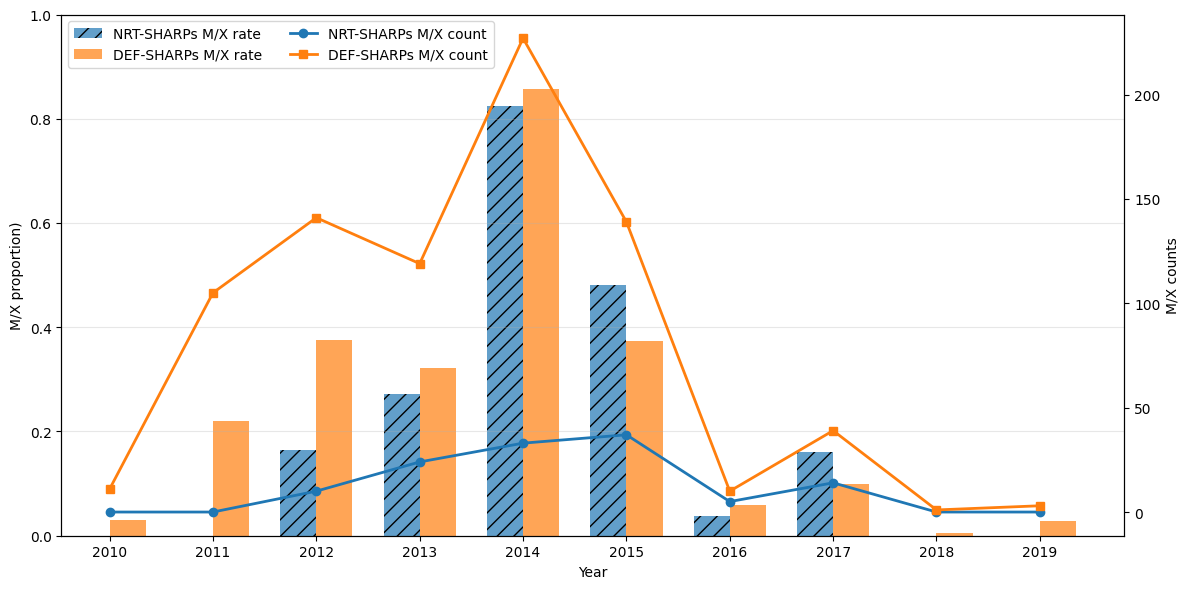

In [75]:
import matplotlib.pyplot as plt
import numpy as np

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

counts_nrt = {year: nrt_sharps[nrt_sharps['year'] == year]['target'].value_counts() for year in years}
counts_def = {year: def_sharps[def_sharps['year'] == year]['target'].value_counts() for year in years}

def positive_rate(count_dict, y):
    pos = count_dict[y].get(1, 0)
    neg = count_dict[y].get(0, 0)
    total = pos + neg
    return pos / total if total > 0 else np.nan

# Compute positive rate
nrt_ratio = [positive_rate(counts_nrt, y) for y in years]
def_ratio = [positive_rate(counts_def, y) for y in years]

# Compute raw counts of positives
nrt_pos = [counts_nrt[y].get(1, 0) for y in years]
def_pos = [counts_def[y].get(1, 0) for y in years]

# -------- Plot --------
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(years))
width = 0.35

# Bars for ratios
ax1.bar(x - width/2, nrt_ratio, width, label='NRT-SHARPs M/X rate', alpha=0.7, hatch='//')
ax1.bar(x + width/2, def_ratio, width, label='DEF-SHARPs M/X rate', alpha=0.7)

ax1.set_xlabel("Year")
ax1.set_ylabel("M/X proportion)")
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_ylim(0, 1)  # ratio range
ax1.grid(axis='y', alpha=0.3)

# Second y-axis for raw counts
ax2 = ax1.twinx()

ax2.plot(x, nrt_pos, marker='o', linewidth=2, label='NRT-SHARPs M/X count', color='tab:blue')
ax2.plot(x, def_pos, marker='s', linewidth=2, label='DEF-SHARPs M/X count', color='tab:orange')
ax2.set_ylabel("M/X counts")

# Combine legends
lines_labels = [*ax1.get_legend_handles_labels(), *ax2.get_legend_handles_labels()]
handles = lines_labels[0] + lines_labels[2]
labels = lines_labels[1] + lines_labels[3]
ax1.legend(handles, labels, ncol=2, loc='upper left')

#plt.title("Positive rate (bars) and target=1 counts (lines) by year")
plt.tight_layout()
plt.savefig("D:/2024_S1/ML_SEP_2402/Final_update/figures/def-nrt-sharp-comparison-MX-rate-and-counts.pdf")
plt.show()